In [23]:
from scipy.spatial import distance
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [55]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0])*0.5, (ptA[1]+ptB[1])*0.5)

# box shape : 4,2
def sort_box(box):
    cx, cy = np.average(box,0)
    centered_box = box - [cx,cy]
    angles = np.arctan2(centered_box[:,1], centered_box[:,0])
    return box[np.argsort(angles)]

In [68]:
pixels_per_matric = 120

image = cv2.imread("image.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)

edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)


cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# sort left-right
sorted_cnts = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[1])


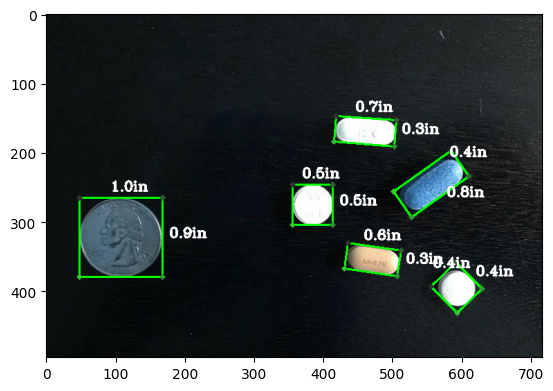

In [70]:
orig = image.copy()
for c in sorted_cnts:
    if  cv2.contourArea(c) < 50:
        continue

    box = cv2.minAreaRect(c)    # minAreaRect return ((x,y), (w,h), rotation angle). x,y is center of rect
    box = cv2.boxPoints(box)    # boxPoints return 4 vertices of rect from minAreaRect
    box = np.array(box, dtype="int")

    # sort box points in clock-wise order
    sorted_box_points = sort_box(box)

    # draw contour for each contour that found.
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    # draw circle for each points of bounding box
    for i,p in enumerate(sorted_box_points):
        cv2.circle(orig, p, 2, [50,50+i*50,50],3)

    # caculate the w, h of found objects
    d1 = distance.euclidean(sorted_box_points[0], sorted_box_points[1])/pixels_per_matric
    d2 = distance.euclidean(sorted_box_points[1], sorted_box_points[2])/pixels_per_matric
    
    (tltrX, tltrY) = midpoint(sorted_box_points[0],sorted_box_points[1])
    (trbrX, trbrY) = midpoint(sorted_box_points[1],sorted_box_points[2])
    
    # put text
    cv2.putText(orig, "{:.1f}in".format(d1), (int(tltrX - 15), int(tltrY-10)), cv2.FONT_HERSHEY_COMPLEX, 0.65, (255,255,255), 2)
    cv2.putText(orig, "{:.1f}in".format(d2), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_COMPLEX, 0.65, (255,255,255), 2)

    
plt.imshow(orig)